In [1]:
## load the packages here
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import regex as re
import statsmodels.api as sm

## Download your data and load them into the Python.
You can find them [**here**](https://drive.google.com/file/d/0Bz9_0VdXvv9bX0MzUEhVdmpCc3c/view?usp=sharing).

- Features and response variables are in different files
- be careful about number of spaces between the values in the file

In [2]:
# little help from us
parameters = []
with open('X_train.txt') as inputfile:
    for row in csv.reader(inputfile):
        parameters.append([float(i) for i in re.sub("\s+",",",row[0].strip()).split(",")])

In [3]:
X = pd.DataFrame(parameters)
X

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.070157,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,0.165259,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.195034,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,0.013865,0.063907,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339


In [4]:
targets = []
with open('y_train.txt') as inputfile2:
    for row in csv.reader(inputfile2):
        targets.append([float(i) for i in re.sub("\s+",",",row[0].strip()).split(",")])

In [5]:
y = pd.DataFrame(targets)
y

,0
0,5.0
1,5.0
2,5.0
3,5.0
4,5.0
...,...
7347,2.0
7348,2.0
7349,2.0
7350,2.0


## Task 1: Create Binary target variable: categories 1,2,3 --> 1, categories 4,5,6 --> 0 
This will represent binary variable indicating if person is walking or not

In [6]:
y.loc[y[0].isin([1, 2, 3]), 0] = 1
y.loc[y[0].isin([4, 5, 6]), 0] = 0

In [7]:
y

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
7347,1.0
7348,1.0
7349,1.0
7350,1.0


## Task 2

+ Create Univariate Binary Logistic Regression with feature number 54, which represents `tGravityAcc-min()-Y`: gravity acceleration signals in direction of Y
+ Compare the results of Logistic regressions from different Python packages (sklearn, statsmodel)
+ Plot the FIT of predicted probabilities to the original values

In [8]:
X_univ = X.loc[:,54]
X_univ = sm.add_constant(X_univ)

In [9]:
X_univ_train, X_univ_test, y_train, y_test = train_test_split(X_univ, y, train_size = 0.8, test_size = 0.2)

### Using sklearn

In [10]:
log_reg = LogisticRegression()
log_reg.fit(X_univ_train, y_train)
y_pred = log_reg.predict(X_univ_test)

C:\Users\Phillipe\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [11]:
y_pred

array([0., 1., 1., ..., 1., 0., 1.])

In [12]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[617, 207],
       [201, 446]], dtype=int64)

In [13]:
metrics.accuracy_score(y_test, y_pred)

0.7226376614547927

### Using statsmodels

In [14]:
log_reg2 = sm.Logit(y_train, X_univ_train).fit()
y_pred2 = log_reg2.predict(X_univ_test)
thres = 0.5
y_pred2 = [int(value > thres) for value in y_pred2]

Optimization terminated successfully.
         Current function value: 0.549037
         Iterations 6


In [15]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred2)
cnf_matrix

array([[616, 208],
       [201, 446]], dtype=int64)

In [16]:
metrics.accuracy_score(y_test, y_pred2)

0.7219578518014956

We can see that both packages gives us identical solutions, taking into account the randomness of the selected training sets and other randomness factors.

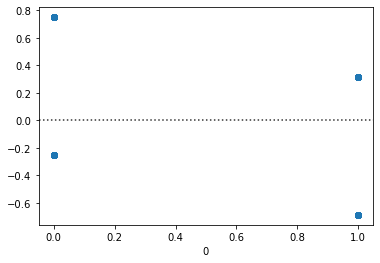

In [17]:
sns.residplot(y_test, y_pred)
plt.show()

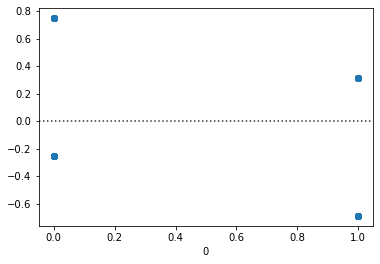

In [18]:
sns.residplot(y_test, y_pred2)
plt.show()

## Task 3
- Try to fit Binary Logistic Regression with all the features? How many are significant?

In [26]:
X = sm.add_constant(X)
X = np.array(X[:], dtype = float)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2)

In [43]:
log_reg3 = sm.Logit(y_train, X_train).fit(method = 'lbfgs')
y_pred3 = log_reg3.predict(X_test)

C:\Users\Phillipe\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '


In [44]:
print_model = log_reg3.summary()
print(print_model)

                           Logit Regression Results                           
Dep. Variable:                      0   No. Observations:                 5881
Model:                          Logit   Df Residuals:                     5340
Method:                           MLE   Df Model:                          540
Date:                Tue, 02 Mar 2021   Pseudo R-squ.:                   1.000
Time:                        23:22:30   Log-Likelihood:               -0.13484
converged:                       True   LL-Null:                       -4044.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1473        nan        nan        nan         nan         nan
x1             0.3187        nan        nan        nan         nan         nan
x2             0.0591        nan        nan        n